# Gradient Descent 
In this notebook, we are going to examine the effectiveness of three popular gradient descent methods, plain vanilla, momentum, and Nesterov's accelerated gradient descent.

*   Define a function to minimise
*   Algorithms for gradient descent
*   Plain vanilla
*   Momentum
*   Nesterov's accelerated gradient

##Importing necessary libraries

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from gd import gd_2d
from mpl_toolkits import mplot3d  #3D scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: ignored

##Define loss function and its gradients
The loss function we used in this exercise is Three-Hump Camel Function (https://www.sfu.ca/~ssurjano/camel3.html).


In [0]:
def fn_loss(x1, x2):
    return 2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2
    
def fn_grad1(x1, x2):
    return 4*x1 - 4.2*x1**3 + x1**5 + x2

def fn_grad2(x1, x2):
    return x1 + 2*x2

##3D scatterplot of the loss function

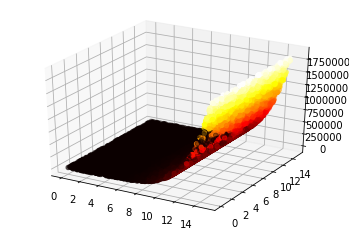

In [0]:
#3D plot of loss function
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x1_range = 15 * np.random.random(10000)
x2_range = 15 * np.random.random(10000)
y_range = fn_loss(x1_range, x2_range)

# Data for three-dimensional scattered points
ax.scatter3D(x1_range, x2_range, y_range, c=y_range, cmap="hot")

##Plain vanilla gradient descent
* X1 and X2 starts from 5
* Step size is 0.001
* Number of iterations is 1000

In [4]:
np.random.seed(0) # Fixing random state for reproducibility
solver = gd_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.pv(x1_init = 5, x2_init = 5, n_iter = 1000, eta = 0.001, tol = 1e-5, tol_upper = 1e+5)

Did not converge


###Plots of plain vanilla gradient descent

Text(0.5, 0.92, 'Plain vanilla: 3D plot of loss function')

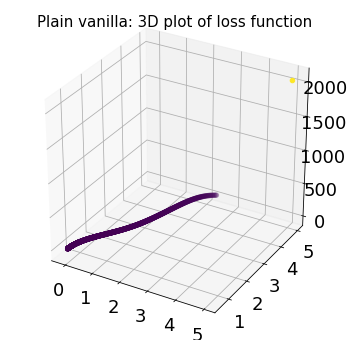

In [22]:
fig = plt.figure(figsize = (6, 6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(solver.x1_path, solver.x2_path, solver.loss_path, c=solver.loss_path)
ax1.set_title("Plain vanilla: 3D plot of loss function", fontsize = 15)

Text(0.5, 1.0, 'Momentum: x1 v.s. loss function')

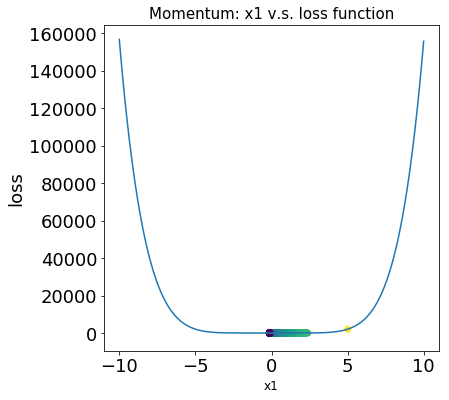

In [19]:
#vanilla gd plot: x1 v.s. loss
x1_range = np.arange(-10, 10, 0.01)
x2_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x1_range, x2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x1_range, y_range)
ax1.scatter(solver.x1_path, solver.loss_path, color=colours)
ax1.set_xlabel('x1')
ax1.set_ylabel('loss')
ax1.set_title("Momentum: x1 v.s. loss function",fontsize = 15)

##Momentum gradient descent
* X1 and X2 starts from 5
* Step size is 0.001
* Number of iterations is 1000

In [25]:
#momentum gradient descent
solver.momentum(x1_init = 5, x2_init = 5, n_iter = 1000, eta = 0.001, tol = 1e-5, tol_upper = 1e+5, alpha = 0.9)

Converged in 688 steps.  Loss fn 3.0974044061639585e-11 achieved by x1 = -2.391835263855995e-06 x2 = 5.774401134702695e-06


###Plots of momentum gradient descent

Text(0.5, 0.92, 'Momentum: 3D plot of loss function')

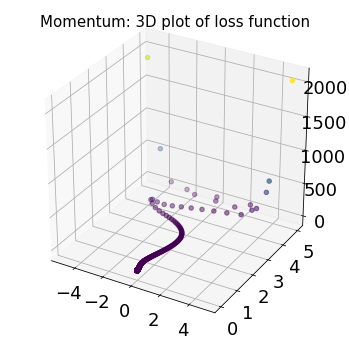

In [26]:
#3D plot
fig = plt.figure(figsize = (6, 6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(solver.x1_path, solver.x2_path, solver.loss_path, c=solver.loss_path)
ax1.set_title("Momentum: 3D plot of loss function", fontsize = 15)

Text(0.5, 1.0, 'Momentum: x1 v.s. loss function')

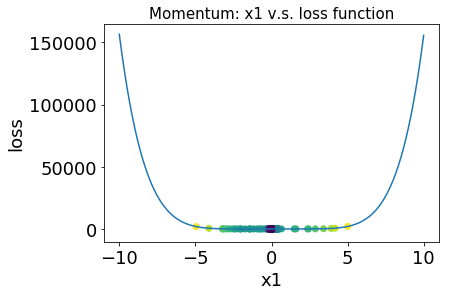

In [27]:
#momentum gd plot: x1 v.s. loss fn
x1_range = np.arange(-10, 10, 0.01)
x2_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x1_range, x2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x1_range, y_range)
ax1.scatter(solver.x1_path, solver.loss_path, color=colours)
ax1.set_xlabel('x1')
ax1.set_ylabel('loss')
ax1.set_title("Momentum: x1 v.s. loss function", fontsize = 15)

##Nesterov accelerated gradient
* X1 and X2 starts from 5
* Step size is 0.001
* Number of iterations is 1000

In [28]:
#nesterov accelerated gradient
solver.nag(x1_init = 5, x2_init = 5, n_iter = 1000, eta = 0.001, tol = 1e-5, tol_upper = 1e+5, alpha = 0.9)

Converged in 679 steps.  Loss fn 0.29863844226343095 achieved by x1 = 1.7475518326534485 x2 = -0.8737709125326627


###Plots of Nesterov accelerated gradient

Text(0.5, 0.92, 'Nesterov: 3D plot of loss function')

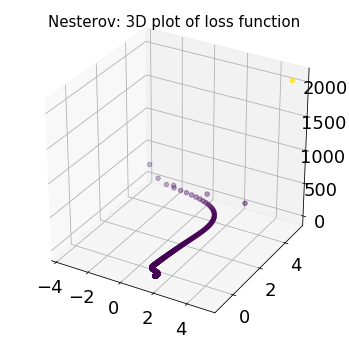

In [30]:
fig = plt.figure(figsize = (6, 6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(solver.x1_path, solver.x2_path, solver.loss_path, c=solver.loss_path)
ax1.set_title("Nesterov: 3D plot of loss function", fontsize = 15)

Text(0.5, 1.0, 'Nesterov: x1 v.s. loss function')

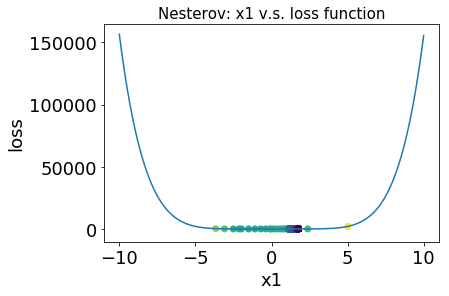

In [31]:
#nesterov gd plot: x1 v.s. loss fn
x1_range = np.arange(-10, 10, 0.01)
x2_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x1_range, x2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x1_range, y_range)
ax1.scatter(solver.x1_path, solver.loss_path, color=colours)
ax1.set_xlabel('x1')
ax1.set_ylabel('loss')
ax1.set_title("Nesterov: x1 v.s. loss function", fontsize = 15)